In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc

rc('font', family='AppleGothic')
df = pd.read_excel('../../../05000266/part4/시도별 전출입 인구수.xlsx', engine='openpyxl', header=0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul.drop('전출지별', axis = 1, inplace = True)
df_seoul.rename({'전입지별':'전입지'}, axis = 1, inplace = True)
df_seoul.set_index('전입지', inplace = True)

df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도']]
df_4.head()
df_4 = df_4.T
df_4.head()

/Users/jasonlee/Desktop/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jasonlee/Desktop/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314


In [3]:
df_4.head()

전입지,충청남도,경상북도,강원도,전라남도
1970,15954,11868,9352,10513
1971,18943,16459,12885,16755
1972,23406,22073,13561,20157
1973,27139,27531,16481,22160
1974,25509,26902,15479,21314


### Example 4-16 p.132 - 세로형 Bar Plot

In [4]:
df_4.index

Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

In [5]:
df_4.columns

Index(['충청남도', '경상북도', '강원도', '전라남도'], dtype='object', name='전입지')

In [6]:
col_years = list(map(str,range(2010,2018)))
df_4 = df_4.loc[col_years]
df_4.index = df_4.index.map(int)

In [20]:
df_4

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591
2015,22299,15113,22659,14598
2016,21741,14236,21590,13065
2017,21020,12464,21016,12426


In [7]:
df_4['충청남도'].index

Int64Index([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype='int64')

In [8]:
df_4['충청남도'].values

array([24522, 24723, 22269, 21486, 21473, 22299, 21741, 21020],
      dtype=object)

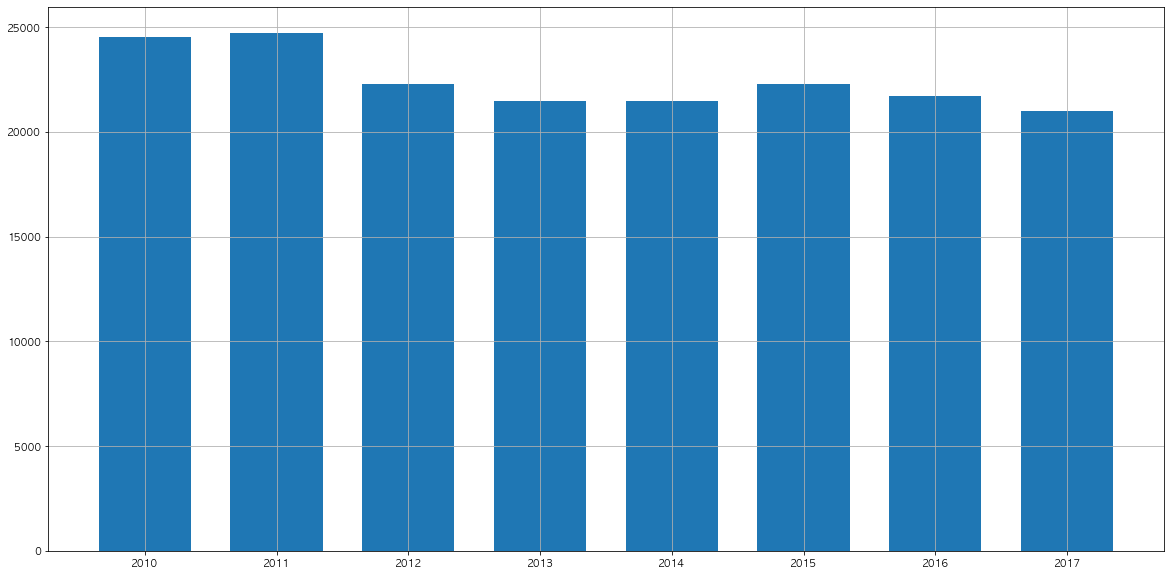

In [9]:
fig = plt.figure(figsize=(20,10))
ax = fig.subplots()

ax.bar(df_4['충청남도'].index, df_4['충청남도'].values, width=0.7)
ax.grid(True)

#### Dataframe.plot(kind = "bar")

In [10]:
df_4.head()

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591


<AxesSubplot:>

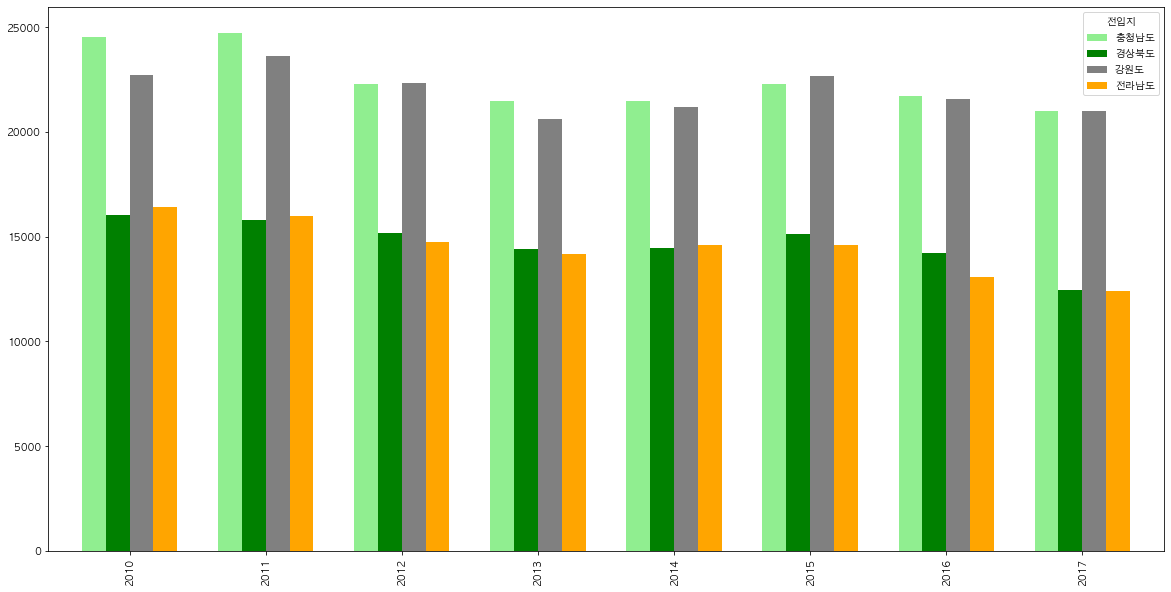

In [11]:
df_4.plot(kind='bar', figsize=(20,10), width=0.7, color=['lightgreen','green','grey','orange'])

<AxesSubplot:>

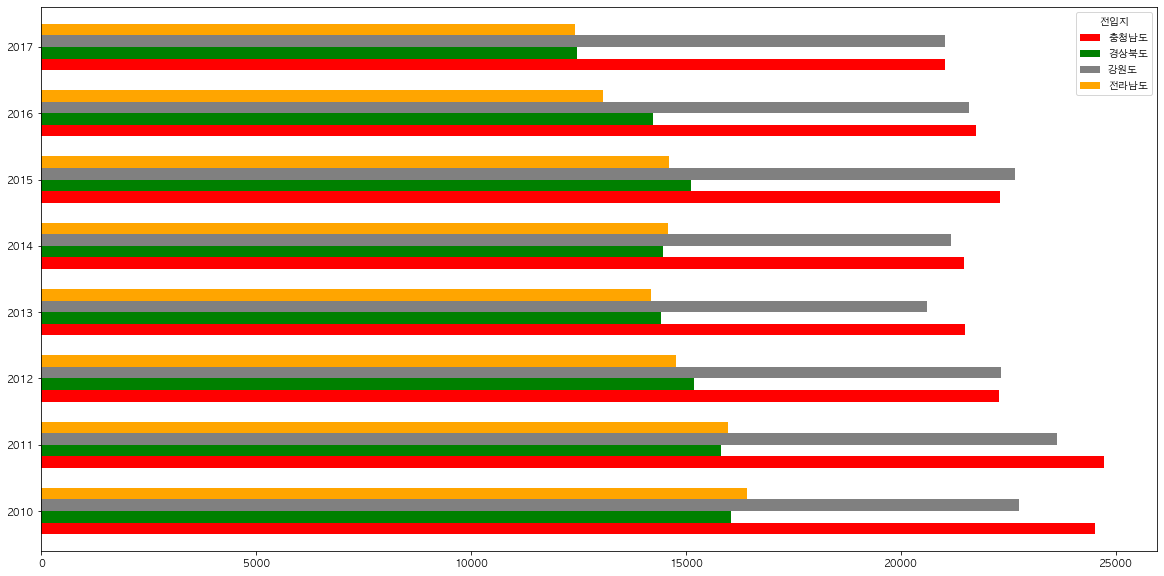

In [12]:
df_4.plot(kind='barh', figsize=(20,10), width=0.7, color=['red','green','grey','orange'])

In [13]:
df_4.head()

전입지,충청남도,경상북도,강원도,전라남도
2010,24522,16042,22736,16429
2011,24723,15818,23624,15974
2012,22269,15191,22332,14765
2013,21486,14420,20601,14187
2014,21473,14456,21173,14591


In [14]:
df_4.sum(axis = 0).values

array([179533, 117740, 175731, 116035], dtype=object)

In [15]:
total = df_4.sum(axis = 0)

In [16]:
total

전입지
충청남도    179533
경상북도    117740
강원도     175731
전라남도    116035
dtype: object

In [17]:
total = total.sort_values(ascending=True)

In [18]:
total

전입지
전라남도    116035
경상북도    117740
강원도     175731
충청남도    179533
dtype: object

<AxesSubplot:ylabel='전입지'>

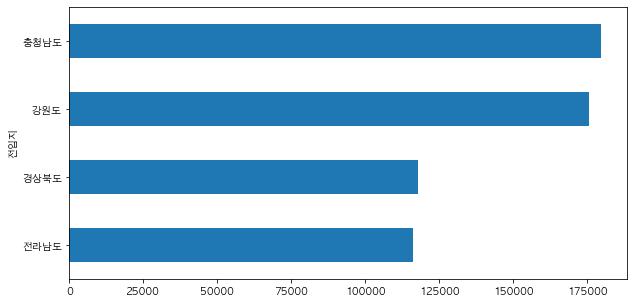

In [19]:
total.plot(kind='barh', figsize=(10,5))

<AxesSubplot:xlabel='전입지'>

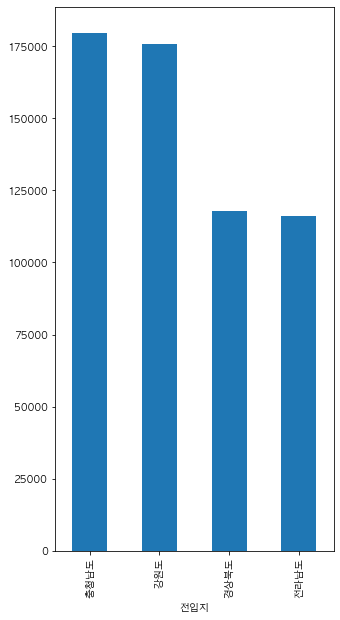

In [23]:
total.sort_values(ascending = False).plot(kind='bar', figsize=(5,10))